# Tornado plot sample script
Steps to read data from Excel template and create tornado plot.
The data file used for this script can be found on https://github.com/stefanpauliuk/Tutorials/tree/master/Files

__Note__: Script works only if data in excel file are sorted so that all negative contributions (if any) occupy the left columns. For example, the signs for one tornado slice could be - - - + + + and for another - + + + + + or + + + + + + or - - + + + + but not - - + - + + or + + + + - -.

In [128]:
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# For Ipython Notebook only
%matplotlib inline 

In [129]:
# Read data from template 
DataFile  = xlrd.open_workbook('C:\\Users\\spauliuk\\FILES\\ARBEIT\\Software\\IPython\\Files\\TornadoPlotExampleData.xlsx')
DataSheet = DataFile.sheet_by_name('Tabelle1')

FigLabel     = DataSheet.cell_value(0,0)
SliceLabels  = [] # Labels for each slice of tornado
StageLabels  = [] # Labels for each stage/process of life cycles for which impact is plotted.
for m in range(1,19):
    SliceLabels.append(DataSheet.cell_value(m,0))
for m in range(1,7):
    StageLabels.append(DataSheet.cell_value(0,m))
PlotData = np.zeros((18,6))
for m in range(0,18):
    for n in range(0,6):
        PlotData[m,n] = DataSheet.cell_value(m +1, n +1)
        
# To use Python's bar plot function we need to determine the starting point of each tornado slice:
PlotStart = np.zeros((18,1))
for m in range(0,18):
    for n in range(0,6):
        if PlotData[m,n] < 0:
            PlotStart[m,0] += PlotData[m,n]
            
PlotData = np.abs(PlotData) # need only positive increments for plot   

PlotData_CS = PlotData.cumsum(axis = 1) # Determine offsets for stacked bar plot
PlotData_CS[:,-1] = 0 # remove last column
PlotData_CS_shifted = np.roll(PlotData_CS,1,axis =1) + np.tile(PlotStart,(1,6)) # Move offset to account for negative values

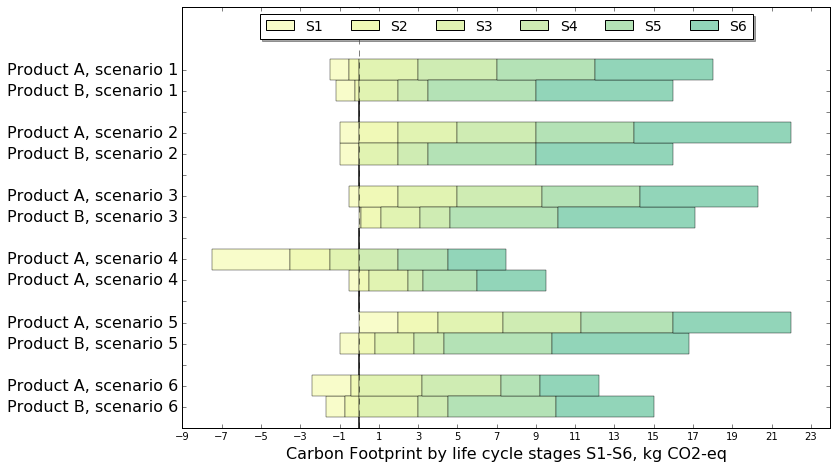

In [130]:
# Create, refine, and export plot

# Define parameters:
Legend_cols   = 6 #columns of legend entries
width         = 1 # the width of the bars (of 1)
pos           = np.arange(0,PlotData.shape[0],1)

fig  = plt.figure(figsize=(10,6.5))  
ax1  = plt.axes([0.05,0.05,0.9,0.9])
MyColorCycle = np.concatenate([cm.YlGnBu(np.linspace(0.05, 0.75, 13)), cm.Reds(np.linspace(0.3, 0.85, 7)), cm.spring(np.linspace(0.7, 1, 5)), cm.BuPu(np.linspace(0.3, 0.85, 6))],0) 
# take from built in color maps
# or define your on color list:
#MyColorCycle = np.array([[255,217,102,255],[191,143,0,255],[180,198,231,255],[97,136,205,255],[48,84,150,255],[198,224,180,255],[137,191,101,255],[84,130,53,255],[198,89,17,255],[239,147,91,255],[248,203,173,255],[113,113,113,255]])/255
ProxyHandlesList = []   # 'Dummy artists' for legend  

for m in range(0,PlotData.shape[1]):
    ax1.barh(bottom=pos-0.5*width, width=PlotData[::-1,m], height=width, color=MyColorCycle[m], left = PlotData_CS_shifted[::-1,m], lw=0.4)
    ProxyHandlesList.append(plt.Rectangle((0, 0), 1, 1, fc=MyColorCycle[m])) # create proxy artist for legend

#ax1.set_ylabel('Tbd.', fontsize =16)
ax1.set_xlabel(FigLabel, fontsize =16)

ax1.set_xlim([     np.floor(min(PlotStart) -1), np.floor(max(PlotData_CS_shifted[:,-1]+PlotData[:,-1]) +2)])
ax1.set_ylim([     0, PlotData.shape[0] + 2])

ax1.set_xticks(np.arange(np.floor(min(PlotStart) -1), np.floor(max(PlotData_CS_shifted[:,-1]+PlotData[:,-1]) +2),2))
#ax1.set_xticklabels([...], fontsize =18)
ax1.set_yticks(pos)
ax1.set_yticklabels(reversed(SliceLabels), fontsize =16)

plt.plot([0, 0], [0, 25], color='k', linestyle='--', linewidth=0.5) # Add vertical line at 0.

plt_lgd  = ax1.legend(ProxyHandlesList,StageLabels,shadow = True, ncol=Legend_cols, prop={'size':14}, loc='upper center')#, bbox_to_anchor=(1.05, 1))
plt.show()

fig.savefig('C:\\Users\\spauliuk\\FILES\\ARBEIT\\Software\\IPython\\TornadoPlotExample.png', bbox_inches='tight', dpi = 500)

In [131]:
PlotData_CS_shifted # Left side offset of bar slice 

array([[ -1.5 ,  -0.5 ,   0.  ,   3.  ,   7.  ,  12.  ],
       [ -1.2 ,  -0.2 ,   0.  ,   2.  ,   3.5 ,   9.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [ -1.  ,   0.  ,   2.  ,   5.  ,   9.  ,  14.  ],
       [ -1.  ,   0.  ,   0.  ,   2.  ,   3.5 ,   9.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [ -0.5 ,   0.  ,   2.  ,   5.  ,   9.3 ,  14.3 ],
       [  0.  ,   0.1 ,   1.1 ,   3.1 ,   4.6 ,  10.1 ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [ -7.5 ,  -3.5 ,  -1.5 ,   0.  ,   2.  ,   4.5 ],
       [ -0.5 ,   0.  ,   0.5 ,   2.5 ,   3.25,   6.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   2.  ,   4.  ,   7.3 ,  11.3 ,  16.  ],
       [ -1.  ,   0.  ,   0.8 ,   2.8 ,   4.3 ,   9.8 ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [ -2.4 ,  -0.4 ,   0.  ,   3.2 ,   7.2 ,   9.2 ],
       [ -1.7 ,  -0.7 ,   0.  ,   3.  ,   4.5 ,  10.  ],
       [  0.  ,   0.  ,   0.  ,